# __Data Blancing Using SMOTE, GAN, VAEs__

## __The summury of the work:__
- Performing Data Blancing Using SMOTE.
- Performing Data Blancing Using GANs.
- Performing Data Blancing Using VAEs.
- Save each generated dataset in a csv file for machine learning models.
- Tested the models on the generated datasets(Random Forest, XGBoosting, KNN).
- Visualizing the results for each balancing technique and each model.



## Load the cleaned dataset_

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
import warnings
warnings.filterwarnings('ignore')


In [4]:
darknet_data = pd.read_csv('./training_dataset.csv')
test_dataset = pd.read_csv('./test_datset.csv')
darknet_data.head()

darknet_data.drop(['Flow ID', 'Timestamp'], axis=1, inplace=True)
test_dataset.drop(['Flow ID', 'Timestamp'], axis=1, inplace=True)

## what we are going to do:
### we chose the _Application Type_ as the target variable and we are going to balanced the data based on this variable. 

### Quick overview of the dataset

In [5]:
darknet_data.shape 

(70214, 82)

In [6]:
darknet_data.isnull().sum().sort_values(ascending=False)

Src IP                  0
Fwd Bulk Rate Avg       0
Fwd Bytes/Bulk Avg      0
Bwd Segment Size Avg    0
Fwd Segment Size Avg    0
                       ..
Fwd IAT Std             0
Fwd IAT Mean            0
Fwd IAT Total           0
Flow IAT Min            0
application             0
Length: 82, dtype: int64

In [7]:
darknet_data['application'].value_counts()

1    19523
5    14549
0    10801
2     7019
4     6648
6     5865
3     3672
7     2137
Name: application, dtype: int64

### as you can notice here the data is imbalanced, we'll some Oversmapling techniques.

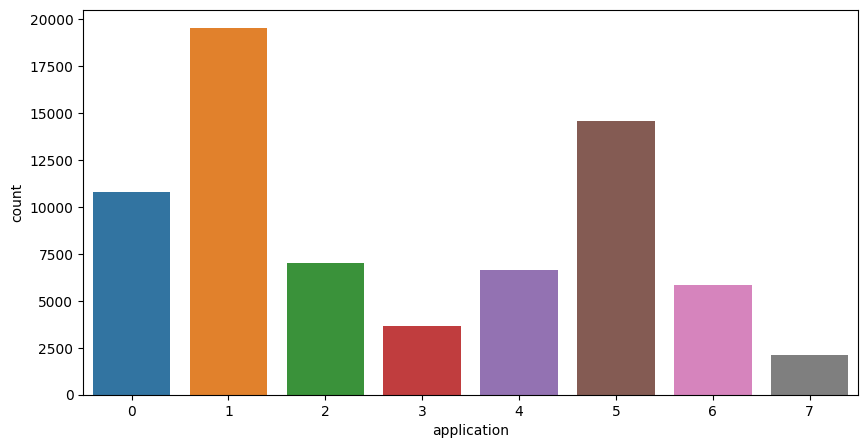

In [8]:
#plot the different values count in a plot 
plt.figure(figsize=(10,5))
sns.countplot(x='application', data=darknet_data)
plt.show()


### as we can notice here the data is imbalanced, we'll use those techniques to balance the training dataset: 
- SMOTE
- ADASYN
- SOMTE-ENN
## we perfrom these three techniques by using three different strategies:
- 20k per class
- 25k per class
- 30k per class

## __SMOTE Technique:__

## Diffrenet used strategies:

In [5]:
sampling_strategy_20k = {0: 20000, 
                        1: 20000, 
                        2: 20000,
                        3: 20000,
                        4: 20000,
                        5: 20000,
                        6: 20000,
                        7: 20000,}

sampling_strategy_25k = {0: 25000,
                         1: 25000,
                         2: 25000,
                         3: 25000,
                         4: 25000,
                         5: 25000,
                         6: 25000,
                         7: 25000, }

sampling_strategy_30k = {0: 30000,
                         1: 30000,
                         2: 30000,
                         3: 30000,
                         4: 30000,
                         5: 30000,
                         6: 30000,
                         7: 30000, }

In [6]:
def perform_smote(X, y, sampling_strategy=None, random_state=42):
    """
    Generate synthetic data to balance a binary or multi-class classification problem using SMOTE.
    Returns:
    numpy.ndarray: Array of shape (num_samples_new, num_features) containing the generated data.
    numpy.ndarray: Array of shape (num_samples_new,) containing the corresponding labels.
    """

    # Apply SMOTE
    smote = SMOTE(sampling_strategy=sampling_strategy,
                  random_state=random_state)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    return X_resampled, y_resampled


X = darknet_data.drop(['application'], axis=1)
y = darknet_data['application']

# Perform SMOTE for 40k samples per class

X_resampled, y_resampled = perform_smote(
    X, y, sampling_strategy=sampling_strategy_20k, random_state=42)

darknet_data_smote_20k_per_class = pd.concat(
    [X_resampled, y_resampled], axis=1)


In [9]:


X_resampled, y_resampled = perform_smote(
    X, y, sampling_strategy=sampling_strategy_25k, random_state=42)

darknet_data_smote_25k_per_class = pd.concat([X_resampled, y_resampled], axis=1)


In [10]:


X_resampled, y_resampled = perform_smote(
    X, y, sampling_strategy=sampling_strategy_30k, random_state=42)

darknet_data_smote_30k_per_class = pd.concat([X_resampled, y_resampled], axis=1)


### Let's begin with training the models on the generated dataset to test the performance of the models on the generated dataset by using the classification report and the confusion matrix by using the following models: 
### - _Random Forest_
### - _XGBoosting_
### - _KNN_
### - _Linear Discriminant Analysis_
### - _LightGBM_

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import lightgbm
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from ctgan import CTGAN

In [14]:
DATA_GENERATED = [
    darknet_data_smote_20k_per_class, 
    darknet_data_smote_25k_per_class,
    darknet_data_smote_30k_per_class
]

classifiers = {
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'LDA': LinearDiscriminantAnalysis(),
    'KNN': KNeighborsClassifier(),
    'LightGBM': lightgbm.LGBMClassifier()
}

cols_to_drop = []


In [15]:
X_test__ = test_dataset.drop(['application'], axis=1)
y_test__ = test_dataset['application']

In [16]:



def train_test_model(dataset, model, target_variable, cols_to_delete_):
    """    
    Parameters:
    dataset (pandas.DataFrame): The dataset to be used for training and testing the model.
    model (sklearn estimator): The machine learning model to be trained and evaluated.
    target_variable (str): The name of the target variable column in the dataset.
    
    Returns:
    dict: A dictionary containing the evaluation metrics (accuracy, precision, recall, f1-score) on the test data.
    """

    # Split dataset into train and test sets
    X = dataset.drop(columns=[target_variable])
    y = dataset[target_variable]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)

    # Train model on training data
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test__)

    # Calculate evaluation metrics on test data
    classification_report__ = classification_report(y_test__, y_pred)
    confusion_matrix__ = confusion_matrix(y_test__, y_pred)

    print(classification_report__)
    sns.heatmap(confusion_matrix__, annot=True, fmt='d')
    plt.show()

    



### _Test for the 20k generated dataset_

Training and evaluating Random Forest model...
              precision    recall  f1-score   support

           0       0.93      0.88      0.91      3597
           1       0.95      0.96      0.95      6505
           2       0.85      0.74      0.79      2229
           3       0.71      0.79      0.75      1241
           4       0.90      0.85      0.87      2314
           5       0.99      1.00      0.99      4878
           6       0.74      0.80      0.77      1952
           7       0.67      0.82      0.74       689

    accuracy                           0.90     23405
   macro avg       0.84      0.86      0.85     23405
weighted avg       0.90      0.90      0.90     23405



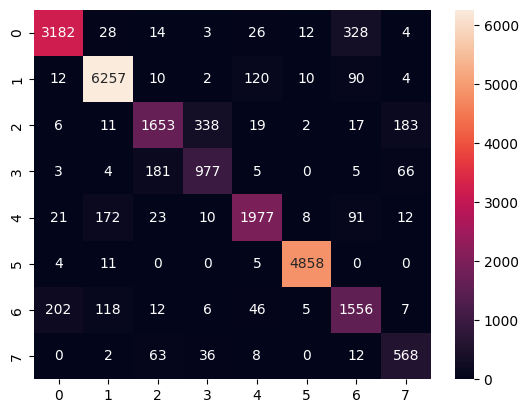


Training and evaluating XGBoost model...
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      3597
           1       0.95      0.97      0.96      6505
           2       0.90      0.71      0.80      2229
           3       0.70      0.83      0.76      1241
           4       0.92      0.87      0.90      2314
           5       0.99      1.00      1.00      4878
           6       0.74      0.85      0.79      1952
           7       0.69      0.92      0.79       689

    accuracy                           0.91     23405
   macro avg       0.86      0.88      0.86     23405
weighted avg       0.92      0.91      0.91     23405



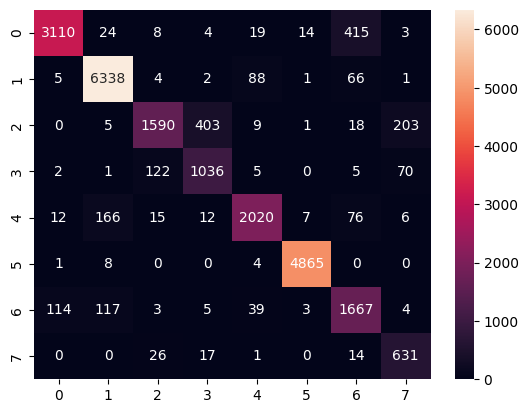


Training and evaluating LDA model...
              precision    recall  f1-score   support

           0       0.67      0.64      0.65      3597
           1       0.72      0.80      0.76      6505
           2       0.39      0.13      0.19      2229
           3       0.22      0.21      0.21      1241
           4       0.46      0.35      0.39      2314
           5       0.80      0.78      0.79      4878
           6       0.37      0.40      0.39      1952
           7       0.24      0.77      0.37       689

    accuracy                           0.60     23405
   macro avg       0.48      0.51      0.47     23405
weighted avg       0.60      0.60      0.59     23405



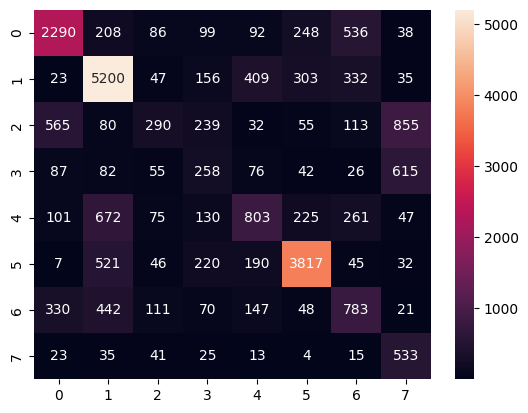


Training and evaluating KNN model...
              precision    recall  f1-score   support

           0       0.90      0.85      0.87      3597
           1       0.92      0.90      0.91      6505
           2       0.78      0.70      0.74      2229
           3       0.63      0.70      0.66      1241
           4       0.80      0.81      0.80      2314
           5       0.95      0.95      0.95      4878
           6       0.67      0.76      0.71      1952
           7       0.61      0.73      0.66       689

    accuracy                           0.85     23405
   macro avg       0.78      0.80      0.79     23405
weighted avg       0.85      0.85      0.85     23405



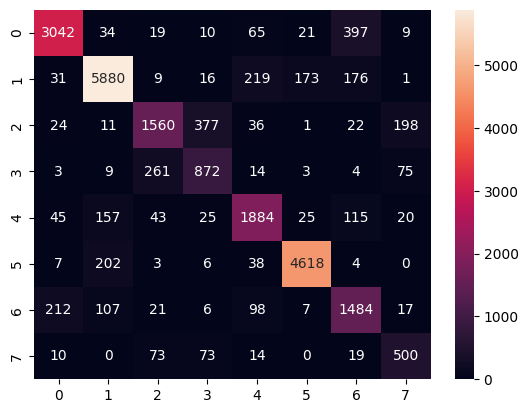


Training and evaluating LightGBM model...
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      3597
           1       0.95      0.97      0.96      6505
           2       0.90      0.72      0.80      2229
           3       0.69      0.85      0.76      1241
           4       0.91      0.87      0.89      2314
           5       1.00      1.00      1.00      4878
           6       0.73      0.88      0.80      1952
           7       0.77      0.95      0.85       689

    accuracy                           0.91     23405
   macro avg       0.86      0.89      0.87     23405
weighted avg       0.92      0.91      0.91     23405



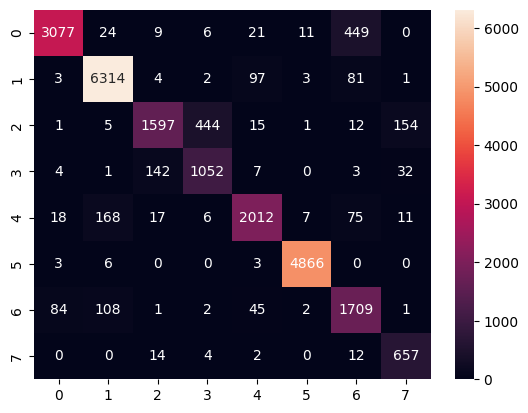

In [17]:
for model_name, model in classifiers.items():
    print(f'Training and evaluating {model_name} model...')
    train_test_model(darknet_data_smote_20k_per_class,
                     model, 'application', cols_to_drop)
    print('')


### _Test for the 25k generated dataset_

Training and evaluating Random Forest model...
              precision    recall  f1-score   support

           0       0.93      0.88      0.91      3597
           1       0.95      0.96      0.95      6505
           2       0.84      0.74      0.79      2229
           3       0.70      0.79      0.74      1241
           4       0.89      0.85      0.87      2314
           5       0.99      1.00      0.99      4878
           6       0.74      0.80      0.77      1952
           7       0.70      0.82      0.75       689

    accuracy                           0.90     23405
   macro avg       0.84      0.86      0.85     23405
weighted avg       0.90      0.90      0.90     23405



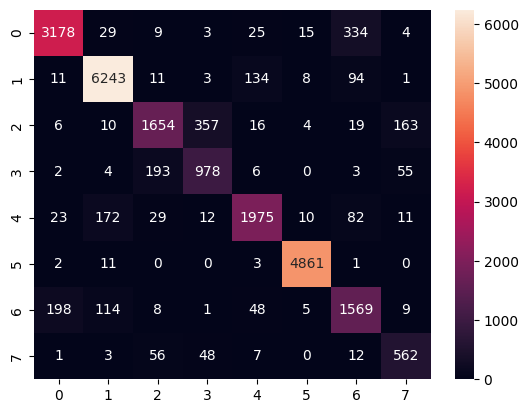


Training and evaluating XGBoost model...
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      3597
           1       0.95      0.97      0.96      6505
           2       0.89      0.72      0.80      2229
           3       0.70      0.83      0.76      1241
           4       0.93      0.88      0.90      2314
           5       0.99      1.00      1.00      4878
           6       0.73      0.86      0.79      1952
           7       0.68      0.90      0.78       689

    accuracy                           0.91     23405
   macro avg       0.86      0.88      0.86     23405
weighted avg       0.91      0.91      0.91     23405



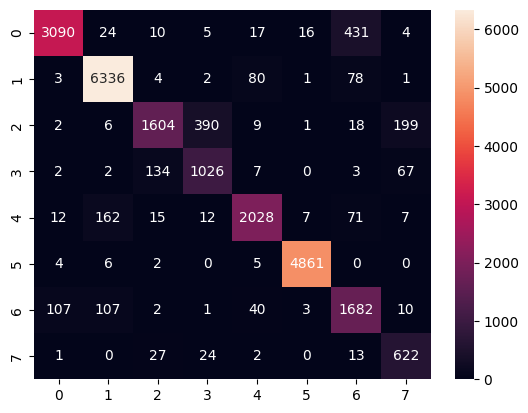


Training and evaluating LDA model...
              precision    recall  f1-score   support

           0       0.67      0.64      0.65      3597
           1       0.72      0.80      0.76      6505
           2       0.39      0.13      0.19      2229
           3       0.21      0.21      0.21      1241
           4       0.46      0.34      0.39      2314
           5       0.81      0.78      0.79      4878
           6       0.37      0.40      0.39      1952
           7       0.24      0.77      0.37       689

    accuracy                           0.60     23405
   macro avg       0.48      0.51      0.47     23405
weighted avg       0.60      0.60      0.59     23405



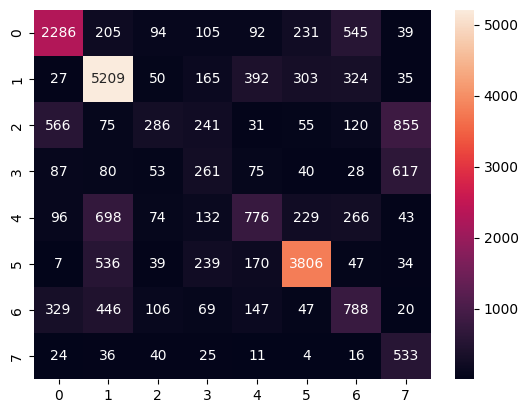


Training and evaluating KNN model...
              precision    recall  f1-score   support

           0       0.91      0.84      0.88      3597
           1       0.92      0.90      0.91      6505
           2       0.79      0.70      0.74      2229
           3       0.63      0.72      0.67      1241
           4       0.79      0.82      0.80      2314
           5       0.95      0.95      0.95      4878
           6       0.66      0.77      0.71      1952
           7       0.61      0.72      0.66       689

    accuracy                           0.85     23405
   macro avg       0.78      0.80      0.79     23405
weighted avg       0.85      0.85      0.85     23405



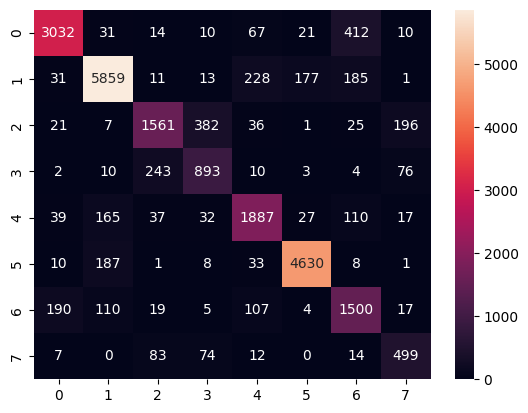


Training and evaluating LightGBM model...
              precision    recall  f1-score   support

           0       0.96      0.84      0.90      3597
           1       0.95      0.97      0.96      6505
           2       0.89      0.72      0.79      2229
           3       0.70      0.84      0.76      1241
           4       0.92      0.87      0.89      2314
           5       1.00      1.00      1.00      4878
           6       0.71      0.87      0.78      1952
           7       0.75      0.95      0.84       689

    accuracy                           0.91     23405
   macro avg       0.86      0.88      0.87     23405
weighted avg       0.91      0.91      0.91     23405



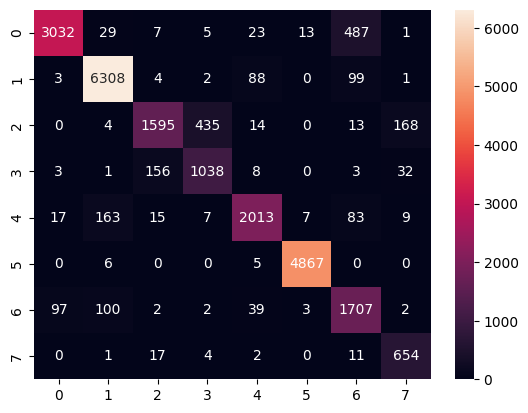

In [18]:
for model_name, model in classifiers.items():
    print(f'Training and evaluating {model_name} model...')
    train_test_model(darknet_data_smote_25k_per_class,
                     model, 'application', cols_to_drop)
    print('')


### _Test for the 30k generated dataset_

Training and evaluating Random Forest model...
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      3597
           1       0.95      0.96      0.96      6505
           2       0.85      0.72      0.78      2229
           3       0.72      0.76      0.74      1241
           4       0.89      0.85      0.87      2314
           5       0.99      1.00      0.99      4878
           6       0.74      0.80      0.77      1952
           7       0.62      0.88      0.73       689

    accuracy                           0.90     23405
   macro avg       0.84      0.86      0.84     23405
weighted avg       0.90      0.90      0.90     23405



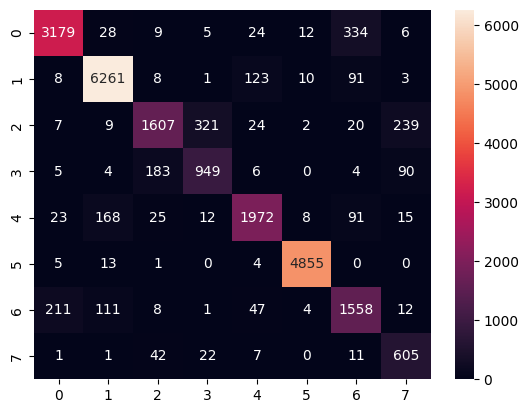


Training and evaluating XGBoost model...
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      3597
           1       0.96      0.97      0.96      6505
           2       0.91      0.70      0.79      2229
           3       0.71      0.82      0.76      1241
           4       0.92      0.88      0.90      2314
           5       0.99      1.00      1.00      4878
           6       0.74      0.86      0.79      1952
           7       0.62      0.93      0.75       689

    accuracy                           0.91     23405
   macro avg       0.85      0.88      0.86     23405
weighted avg       0.92      0.91      0.91     23405



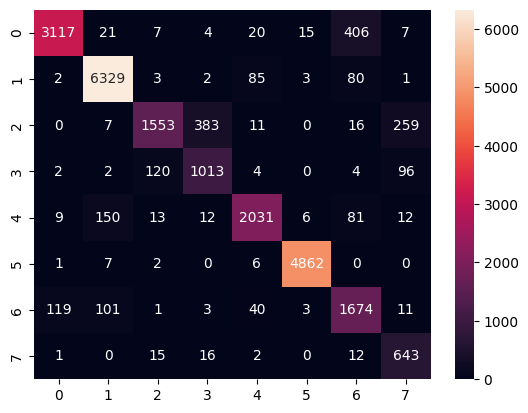


Training and evaluating LDA model...
              precision    recall  f1-score   support

           0       0.67      0.64      0.65      3597
           1       0.71      0.81      0.76      6505
           2       0.38      0.13      0.19      2229
           3       0.23      0.17      0.20      1241
           4       0.45      0.29      0.35      2314
           5       0.79      0.77      0.78      4878
           6       0.37      0.39      0.38      1952
           7       0.21      0.80      0.33       689

    accuracy                           0.59     23405
   macro avg       0.48      0.50      0.45     23405
weighted avg       0.60      0.59      0.58     23405



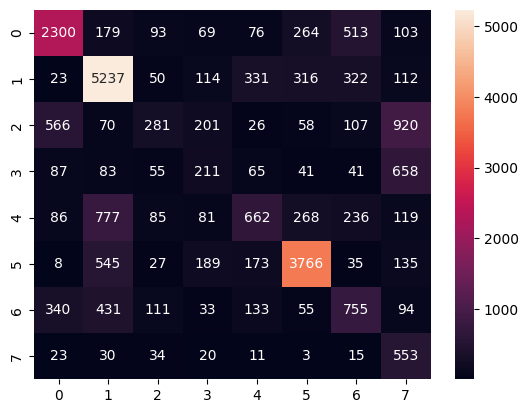


Training and evaluating KNN model...
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      3597
           1       0.93      0.90      0.92      6505
           2       0.80      0.68      0.73      2229
           3       0.65      0.71      0.68      1241
           4       0.80      0.82      0.81      2314
           5       0.96      0.95      0.95      4878
           6       0.67      0.76      0.71      1952
           7       0.55      0.79      0.65       689

    accuracy                           0.85     23405
   macro avg       0.78      0.81      0.79     23405
weighted avg       0.86      0.85      0.85     23405



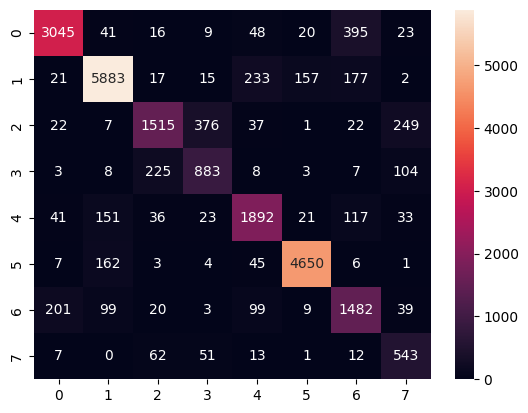


Training and evaluating LightGBM model...
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      3597
           1       0.95      0.97      0.96      6505
           2       0.90      0.69      0.78      2229
           3       0.68      0.85      0.76      1241
           4       0.92      0.87      0.89      2314
           5       0.99      1.00      1.00      4878
           6       0.72      0.88      0.79      1952
           7       0.73      0.96      0.83       689

    accuracy                           0.91     23405
   macro avg       0.86      0.88      0.86     23405
weighted avg       0.91      0.91      0.91     23405



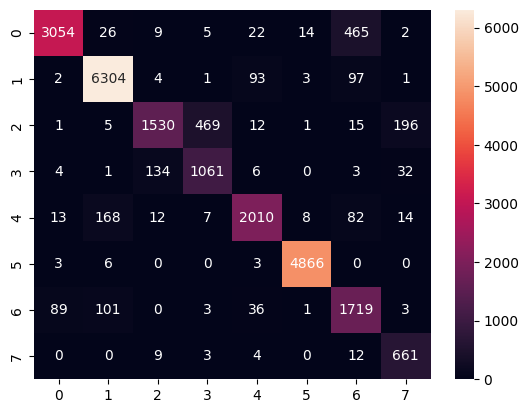

In [19]:
for model_name, model in classifiers.items():
    print(f'Training and evaluating {model_name} model...')
    train_test_model(darknet_data_smote_30k_per_class,
                     model, 'application', cols_to_drop)
    print('')


## __ADASYN Technique__

In [14]:
def perform_adasyn(X, y, sampling_strategy=None, random_state=42):
    """
    Returns: 
    numpy.ndarray: Array of shape (num_samples_new, num_features) containing the generated data.
    numpy.ndarray: Array of shape (num_samples_new,) containing the corresponding labels.
    """

    # Apply ADASYN
    adasyn = ADASYN(sampling_strategy=sampling_strategy,
                    random_state=random_state)
    X_resampled, y_resampled = adasyn.fit_resample(X, y)

    return X_resampled, y_resampled


X = darknet_data.drop(['application'], axis=1)
y = darknet_data['application']



#X_resampled, y_resampled = perform_adasyn(X, y, sampling_strategy=sampling_strategy_20k, random_state=42)

#darknet_data_adasyn_20k_per_class = pd.concat([X_resampled, y_resampled], axis=1)


In [15]:
X_resampled, y_resampled = perform_adasyn(
    X, y, sampling_strategy=sampling_strategy_25k, random_state=42)

darknet_data_adasyn_25k_per_class = pd.concat(
    [X_resampled, y_resampled], axis=1)


In [22]:
X_resampled, y_resampled = perform_adasyn(
    X, y, sampling_strategy=sampling_strategy_30k, random_state=42)

darknet_data_adasyn_30k_per_class = pd.concat(
    [X_resampled, y_resampled], axis=1)



## let's begin with training the models on the generated dataset:

### _Test for the 25k generated dataset_

Training and evaluating Random Forest model...
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      3597
           1       0.95      0.95      0.95      6505
           2       0.84      0.73      0.78      2229
           3       0.70      0.78      0.74      1241
           4       0.87      0.85      0.86      2314
           5       0.99      1.00      0.99      4878
           6       0.75      0.76      0.76      1952
           7       0.67      0.79      0.72       689

    accuracy                           0.89     23405
   macro avg       0.83      0.85      0.84     23405
weighted avg       0.89      0.89      0.89     23405



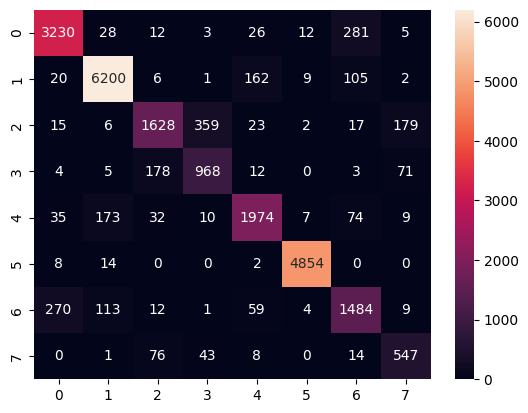


Training and evaluating XGBoost model...
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      3597
           1       0.96      0.96      0.96      6505
           2       0.90      0.69      0.78      2229
           3       0.70      0.84      0.76      1241
           4       0.90      0.88      0.89      2314
           5       1.00      1.00      1.00      4878
           6       0.78      0.77      0.78      1952
           7       0.64      0.91      0.75       689

    accuracy                           0.90     23405
   macro avg       0.85      0.87      0.85     23405
weighted avg       0.91      0.90      0.90     23405



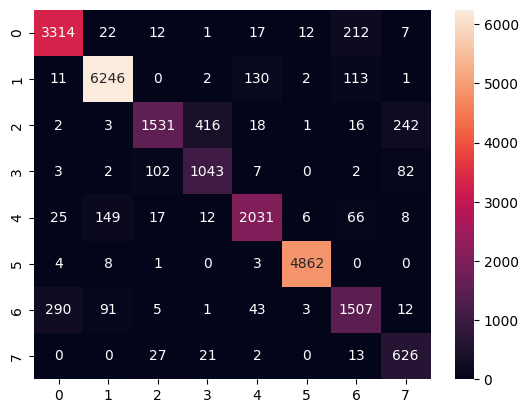


Training and evaluating LDA model...
              precision    recall  f1-score   support

           0       0.61      0.69      0.65      3597
           1       0.68      0.68      0.68      6505
           2       0.21      0.04      0.07      2229
           3       0.23      0.11      0.15      1241
           4       0.29      0.39      0.33      2314
           5       0.77      0.79      0.78      4878
           6       0.37      0.34      0.36      1952
           7       0.19      0.54      0.28       689

    accuracy                           0.55     23405
   macro avg       0.42      0.45      0.41     23405
weighted avg       0.54      0.55      0.54     23405



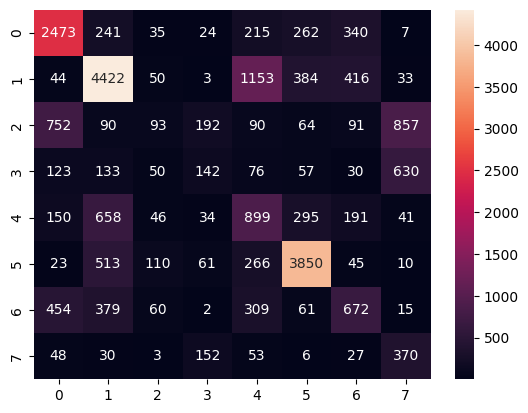


Training and evaluating KNN model...
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      3597
           1       0.94      0.89      0.91      6505
           2       0.78      0.68      0.73      2229
           3       0.64      0.72      0.68      1241
           4       0.78      0.82      0.80      2314
           5       0.95      0.96      0.96      4878
           6       0.67      0.71      0.69      1952
           7       0.59      0.75      0.66       689

    accuracy                           0.85     23405
   macro avg       0.78      0.80      0.79     23405
weighted avg       0.85      0.85      0.85     23405



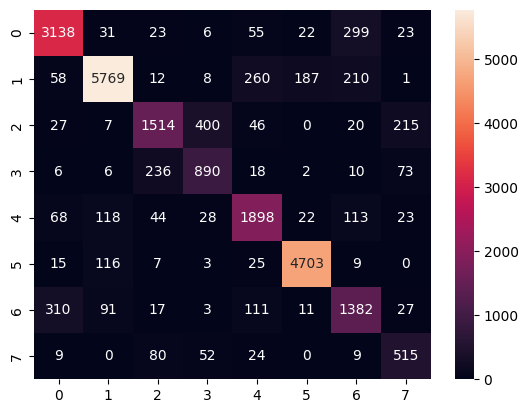


Training and evaluating LightGBM model...
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      3597
           1       0.96      0.96      0.96      6505
           2       0.90      0.67      0.77      2229
           3       0.67      0.87      0.76      1241
           4       0.89      0.87      0.88      2314
           5       1.00      1.00      1.00      4878
           6       0.77      0.78      0.78      1952
           7       0.75      0.96      0.84       689

    accuracy                           0.90     23405
   macro avg       0.86      0.88      0.86     23405
weighted avg       0.91      0.90      0.90     23405



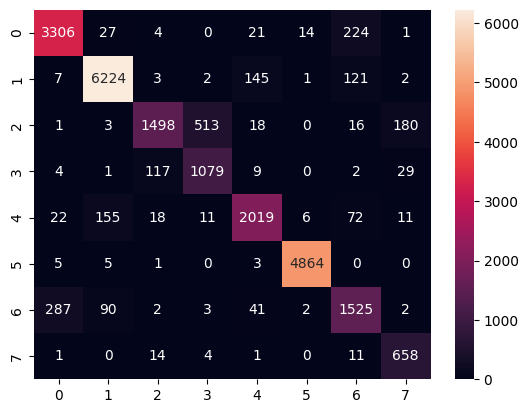

In [23]:
for model_name, model in classifiers.items():
    print(f'Training and evaluating {model_name} model...')
    train_test_model(darknet_data_adasyn_25k_per_class,
                     model, 'application', cols_to_drop)
    print('')


### _Test for the 30k generated dataset_

Training and evaluating Random Forest model...
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      3597
           1       0.95      0.96      0.95      6505
           2       0.85      0.72      0.78      2229
           3       0.73      0.76      0.75      1241
           4       0.87      0.85      0.86      2314
           5       0.99      1.00      0.99      4878
           6       0.75      0.76      0.76      1952
           7       0.61      0.86      0.71       689

    accuracy                           0.89     23405
   macro avg       0.83      0.85      0.84     23405
weighted avg       0.90      0.89      0.89     23405



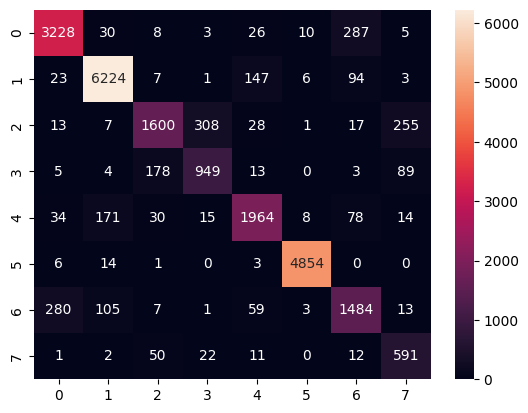


Training and evaluating XGBoost model...
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      3597
           1       0.96      0.96      0.96      6505
           2       0.91      0.65      0.76      2229
           3       0.69      0.83      0.75      1241
           4       0.90      0.87      0.89      2314
           5       0.99      1.00      1.00      4878
           6       0.78      0.76      0.77      1952
           7       0.60      0.95      0.73       689

    accuracy                           0.90     23405
   macro avg       0.84      0.87      0.85     23405
weighted avg       0.91      0.90      0.90     23405



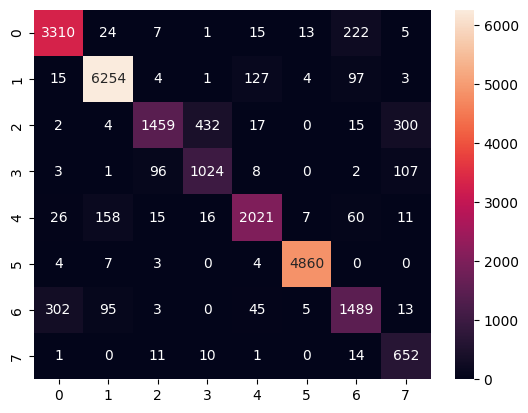


Training and evaluating LDA model...
              precision    recall  f1-score   support

           0       0.61      0.69      0.64      3597
           1       0.68      0.69      0.68      6505
           2       0.30      0.04      0.06      2229
           3       0.26      0.11      0.15      1241
           4       0.30      0.36      0.33      2314
           5       0.76      0.80      0.78      4878
           6       0.37      0.34      0.35      1952
           7       0.22      0.76      0.34       689

    accuracy                           0.56     23405
   macro avg       0.44      0.47      0.42     23405
weighted avg       0.55      0.56      0.54     23405



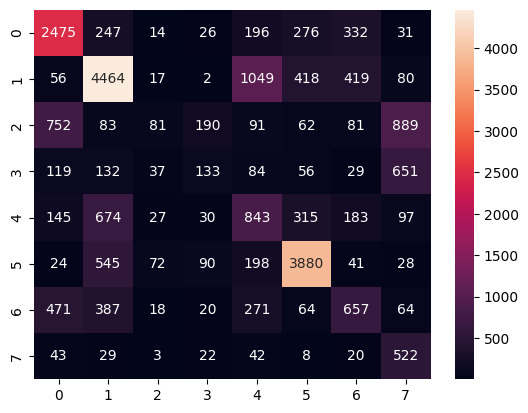


Training and evaluating KNN model...
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      3597
           1       0.93      0.86      0.89      6505
           2       0.80      0.66      0.72      2229
           3       0.65      0.72      0.69      1241
           4       0.79      0.81      0.80      2314
           5       0.91      0.96      0.93      4878
           6       0.67      0.69      0.68      1952
           7       0.52      0.79      0.63       689

    accuracy                           0.83     23405
   macro avg       0.77      0.79      0.78     23405
weighted avg       0.84      0.83      0.83     23405



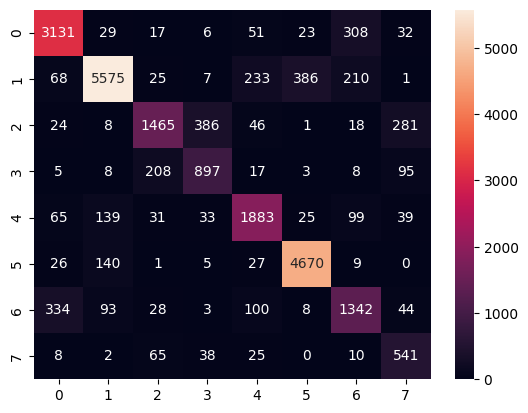


Training and evaluating LightGBM model...
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      3597
           1       0.96      0.96      0.96      6505
           2       0.90      0.65      0.76      2229
           3       0.67      0.87      0.75      1241
           4       0.90      0.87      0.88      2314
           5       0.99      1.00      1.00      4878
           6       0.77      0.77      0.77      1952
           7       0.70      0.96      0.81       689

    accuracy                           0.90     23405
   macro avg       0.85      0.87      0.85     23405
weighted avg       0.91      0.90      0.90     23405



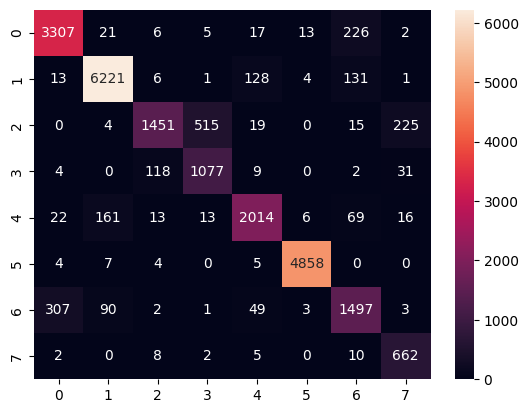

In [24]:
for model_name, model in classifiers.items():
    print(f'Training and evaluating {model_name} model...')
    train_test_model(darknet_data_adasyn_30k_per_class,
                     model, 'application', cols_to_drop)
    print('')


In [100]:
#save the 30k per class generated data in a csv file
darknet_data_adasyn_30k_per_class.to_csv('darknet_data_adasyn_30k_per_class.csv', index=False)

## __SMOTE-ENN Technique__

In [16]:
def perform_smote_enn(X, y, sampling_strategy=None, random_state=42):
    """
    Generate synthetic data to balance a binary or multi-class classification problem using SMOTE-ENN.
    Returns:
    numpy.ndarray: Array of shape (num_samples_new, num_features) containing the generated data.
    numpy.ndarray: Array of shape (num_samples_new,) containing the corresponding labels.
    """

    # Apply SMOTE-ENN
    smote_enn = SMOTEENN(sampling_strategy=sampling_strategy,
                         random_state=random_state)
    X_resampled, y_resampled = smote_enn.fit_resample(X, y)

    return X_resampled, y_resampled


X = darknet_data.drop(['application'], axis=1)
y = darknet_data['application']


X_resampled, y_resampled = perform_smote_enn(
    X, y, sampling_strategy=sampling_strategy_20k)

darknet_data_smote_enn_20k_per_class = pd.concat(
    [X_resampled, y_resampled], axis=1)


In [ ]:
#save the 20k per class generated data in a csv file
darknet_data_smote_enn_20k_per_class.to_csv('darknet_data_smote_enn_20k_per_class.csv', index=False)

In [26]:
X_resampled, y_resampled = perform_smote_enn(
    X, y, sampling_strategy=sampling_strategy_25k)

darknet_data_smote_enn_25k_per_class = pd.concat(
    [X_resampled, y_resampled], axis=1)

In [27]:
X_resampled, y_resampled = perform_smote_enn(
    X, y, sampling_strategy=sampling_strategy_30k)

darknet_data_smote_enn_30k_per_class = pd.concat(
    [X_resampled, y_resampled], axis=1)

## Test for the 20k generated dataset: 

Training and evaluating Random Forest model...
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      3597
           1       0.95      0.94      0.95      6505
           2       0.83      0.69      0.75      2229
           3       0.67      0.74      0.70      1241
           4       0.86      0.84      0.85      2314
           5       0.99      1.00      0.99      4878
           6       0.67      0.84      0.75      1952
           7       0.62      0.85      0.72       689

    accuracy                           0.88     23405
   macro avg       0.82      0.84      0.83     23405
weighted avg       0.89      0.88      0.88     23405



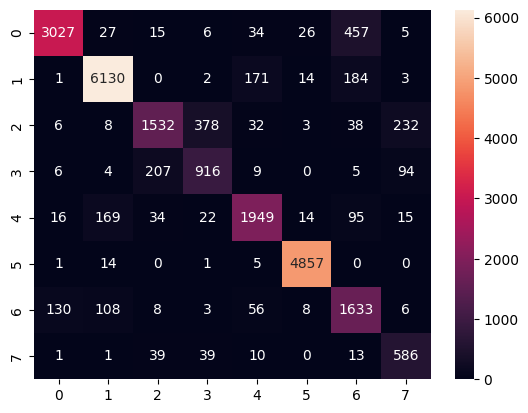

Training and evaluating XGBoost model...
              precision    recall  f1-score   support

           0       0.98      0.83      0.90      3597
           1       0.95      0.96      0.95      6505
           2       0.88      0.71      0.78      2229
           3       0.69      0.80      0.74      1241
           4       0.89      0.87      0.88      2314
           5       0.99      1.00      0.99      4878
           6       0.69      0.89      0.77      1952
           7       0.68      0.90      0.77       689

    accuracy                           0.90     23405
   macro avg       0.84      0.87      0.85     23405
weighted avg       0.91      0.90      0.90     23405



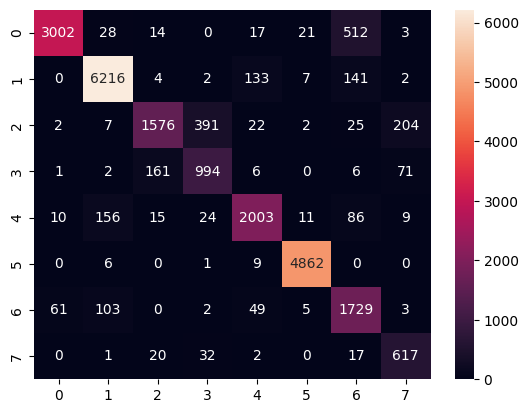

Training and evaluating LDA model...
              precision    recall  f1-score   support

           0       0.67      0.57      0.62      3597
           1       0.72      0.80      0.75      6505
           2       0.28      0.16      0.20      2229
           3       0.19      0.17      0.18      1241
           4       0.48      0.36      0.41      2314
           5       0.82      0.80      0.81      4878
           6       0.38      0.38      0.38      1952
           7       0.24      0.79      0.36       689

    accuracy                           0.59     23405
   macro avg       0.47      0.50      0.46     23405
weighted avg       0.60      0.59      0.58     23405



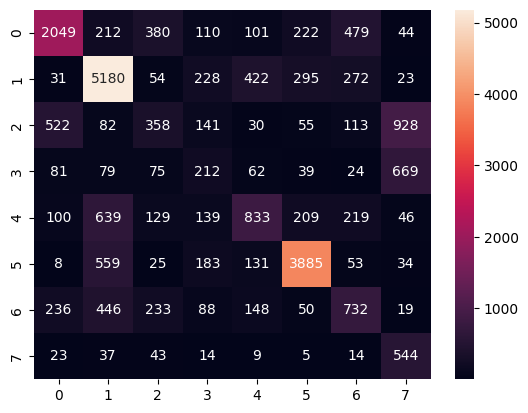

Training and evaluating KNN model...
              precision    recall  f1-score   support

           0       0.94      0.82      0.88      3597
           1       0.92      0.88      0.90      6505
           2       0.80      0.68      0.74      2229
           3       0.61      0.66      0.63      1241
           4       0.79      0.80      0.80      2314
           5       0.93      0.95      0.94      4878
           6       0.62      0.82      0.71      1952
           7       0.55      0.75      0.63       689

    accuracy                           0.84     23405
   macro avg       0.77      0.80      0.78     23405
weighted avg       0.85      0.84      0.84     23405



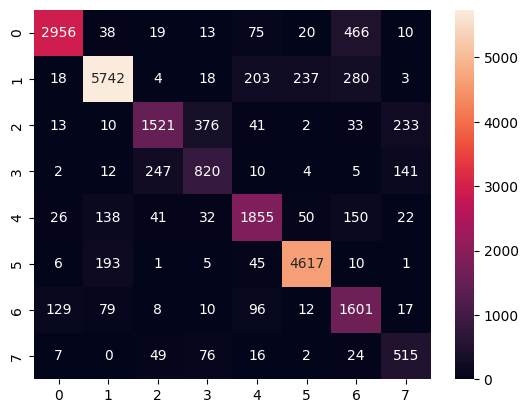

Training and evaluating LightGBM model...
              precision    recall  f1-score   support

           0       0.98      0.83      0.90      3597
           1       0.95      0.95      0.95      6505
           2       0.86      0.71      0.78      2229
           3       0.68      0.81      0.74      1241
           4       0.89      0.87      0.88      2314
           5       0.99      1.00      0.99      4878
           6       0.69      0.89      0.77      1952
           7       0.75      0.94      0.83       689

    accuracy                           0.90     23405
   macro avg       0.85      0.87      0.86     23405
weighted avg       0.91      0.90      0.90     23405



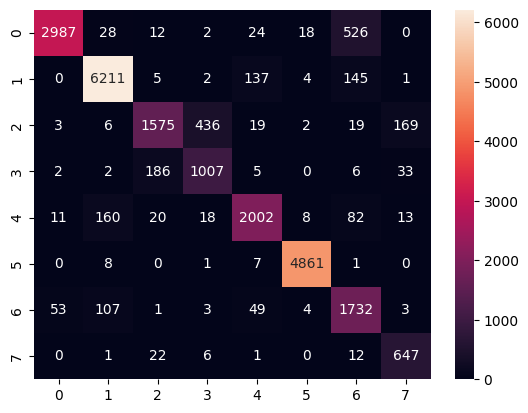

In [28]:
for model_name, model in classifiers.items():
    print(f'Training and evaluating {model_name} model...')
    train_test_model(darknet_data_smote_enn_20k_per_class,
                     model, 'application', cols_to_drop)

## Test for the 25k generated dataset:

Training and evaluating Random Forest model...
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      3597
           1       0.95      0.94      0.95      6505
           2       0.83      0.70      0.76      2229
           3       0.66      0.73      0.70      1241
           4       0.87      0.85      0.86      2314
           5       0.99      1.00      0.99      4878
           6       0.68      0.83      0.75      1952
           7       0.65      0.84      0.73       689

    accuracy                           0.88     23405
   macro avg       0.82      0.84      0.83     23405
weighted avg       0.89      0.88      0.89     23405



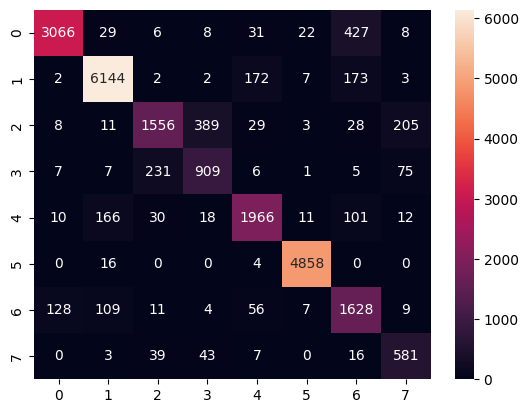

Training and evaluating XGBoost model...
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      3597
           1       0.96      0.95      0.95      6505
           2       0.87      0.72      0.79      2229
           3       0.69      0.79      0.74      1241
           4       0.88      0.87      0.88      2314
           5       0.99      1.00      1.00      4878
           6       0.69      0.88      0.77      1952
           7       0.68      0.89      0.77       689

    accuracy                           0.90     23405
   macro avg       0.84      0.87      0.85     23405
weighted avg       0.91      0.90      0.90     23405



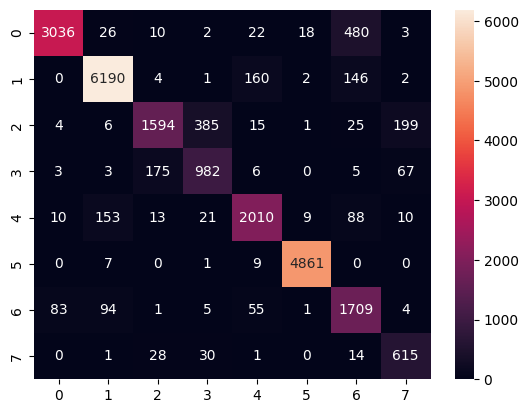

Training and evaluating LDA model...
              precision    recall  f1-score   support

           0       0.67      0.59      0.63      3597
           1       0.72      0.80      0.76      6505
           2       0.29      0.15      0.20      2229
           3       0.19      0.17      0.18      1241
           4       0.49      0.35      0.41      2314
           5       0.81      0.79      0.80      4878
           6       0.38      0.37      0.38      1952
           7       0.24      0.79      0.36       689

    accuracy                           0.59     23405
   macro avg       0.47      0.50      0.46     23405
weighted avg       0.59      0.59      0.58     23405



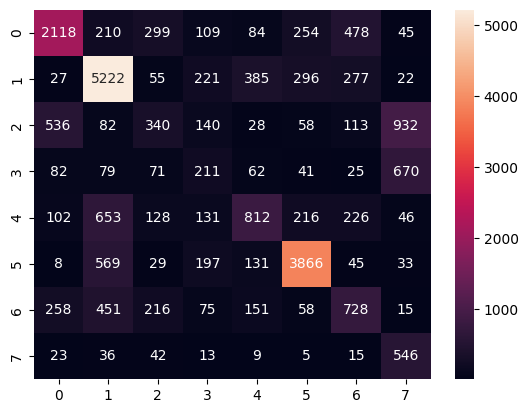

Training and evaluating KNN model...
              precision    recall  f1-score   support

           0       0.93      0.83      0.88      3597
           1       0.93      0.89      0.91      6505
           2       0.81      0.69      0.74      2229
           3       0.61      0.67      0.64      1241
           4       0.79      0.81      0.80      2314
           5       0.94      0.95      0.94      4878
           6       0.64      0.81      0.71      1952
           7       0.57      0.74      0.64       689

    accuracy                           0.84     23405
   macro avg       0.78      0.80      0.78     23405
weighted avg       0.85      0.84      0.85     23405



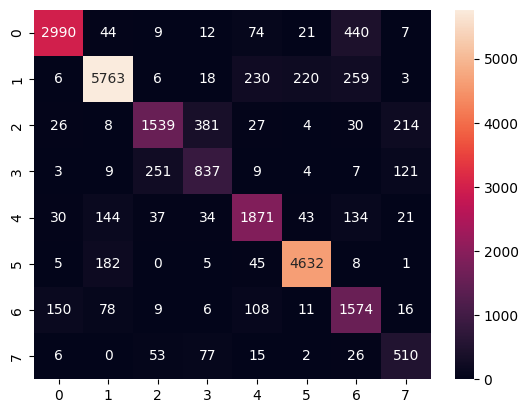

Training and evaluating LightGBM model...
              precision    recall  f1-score   support

           0       0.98      0.83      0.90      3597
           1       0.95      0.95      0.95      6505
           2       0.87      0.71      0.78      2229
           3       0.68      0.81      0.74      1241
           4       0.88      0.87      0.87      2314
           5       0.99      1.00      1.00      4878
           6       0.69      0.89      0.78      1952
           7       0.76      0.94      0.84       689

    accuracy                           0.90     23405
   macro avg       0.85      0.87      0.86     23405
weighted avg       0.91      0.90      0.90     23405



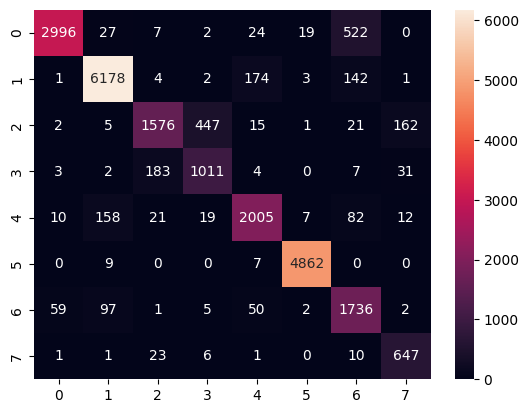

In [29]:
for model_name, model in classifiers.items():
    print(f'Training and evaluating {model_name} model...')
    train_test_model(darknet_data_smote_enn_25k_per_class,
                     model, 'application', cols_to_drop)


## Test for the 30k generated dataset:

Training and evaluating Random Forest model...
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      3597
           1       0.95      0.95      0.95      6505
           2       0.84      0.69      0.76      2229
           3       0.69      0.70      0.69      1241
           4       0.87      0.85      0.86      2314
           5       0.99      1.00      0.99      4878
           6       0.69      0.82      0.75      1952
           7       0.57      0.90      0.70       689

    accuracy                           0.88     23405
   macro avg       0.82      0.84      0.82     23405
weighted avg       0.89      0.88      0.89     23405



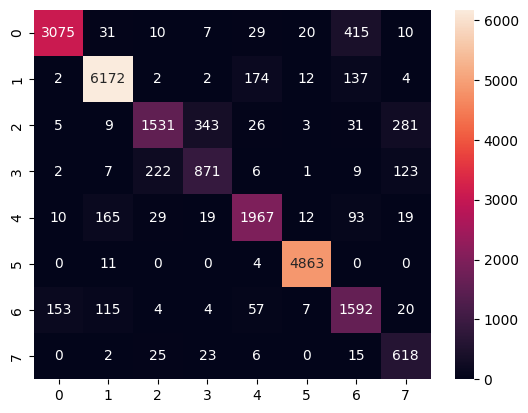

Training and evaluating XGBoost model...
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      3597
           1       0.95      0.95      0.95      6505
           2       0.88      0.71      0.78      2229
           3       0.72      0.78      0.75      1241
           4       0.88      0.87      0.88      2314
           5       0.99      1.00      0.99      4878
           6       0.70      0.86      0.77      1952
           7       0.62      0.94      0.74       689

    accuracy                           0.90     23405
   macro avg       0.84      0.87      0.85     23405
weighted avg       0.91      0.90      0.90     23405



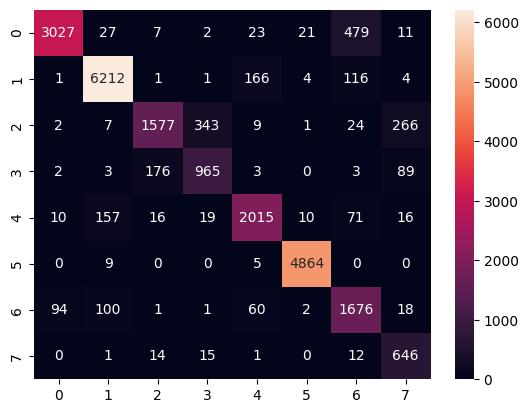

Training and evaluating LDA model...
              precision    recall  f1-score   support

           0       0.68      0.58      0.63      3597
           1       0.72      0.81      0.76      6505
           2       0.31      0.15      0.21      2229
           3       0.23      0.15      0.18      1241
           4       0.50      0.32      0.39      2314
           5       0.80      0.78      0.79      4878
           6       0.39      0.38      0.38      1952
           7       0.20      0.81      0.32       689

    accuracy                           0.59     23405
   macro avg       0.48      0.50      0.46     23405
weighted avg       0.60      0.59      0.58     23405



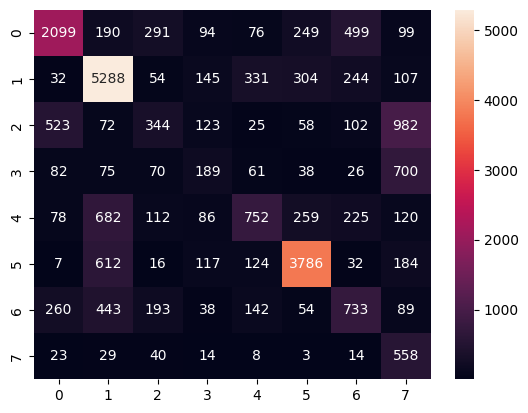

Training and evaluating KNN model...
              precision    recall  f1-score   support

           0       0.93      0.83      0.88      3597
           1       0.92      0.89      0.91      6505
           2       0.81      0.68      0.74      2229
           3       0.64      0.65      0.64      1241
           4       0.80      0.81      0.81      2314
           5       0.94      0.95      0.95      4878
           6       0.65      0.79      0.71      1952
           7       0.51      0.82      0.63       689

    accuracy                           0.84     23405
   macro avg       0.78      0.80      0.78     23405
weighted avg       0.86      0.84      0.85     23405



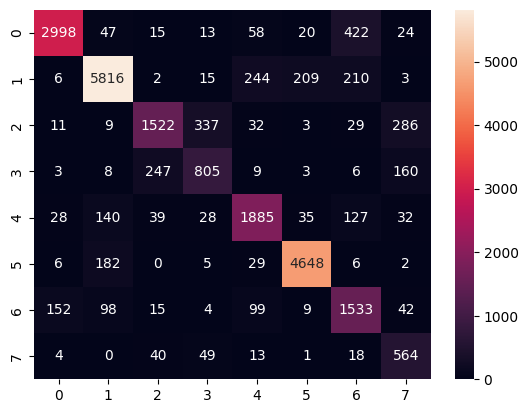

Training and evaluating LightGBM model...
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      3597
           1       0.95      0.95      0.95      6505
           2       0.87      0.71      0.78      2229
           3       0.69      0.81      0.75      1241
           4       0.88      0.87      0.88      2314
           5       0.99      1.00      1.00      4878
           6       0.70      0.87      0.78      1952
           7       0.71      0.96      0.82       689

    accuracy                           0.90     23405
   macro avg       0.85      0.88      0.86     23405
weighted avg       0.91      0.90      0.90     23405



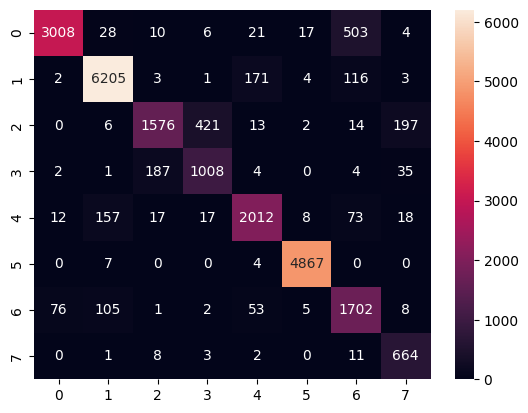

In [30]:
for model_name, model in classifiers.items():
    print(f'Training and evaluating {model_name} model...')
    train_test_model(darknet_data_smote_enn_30k_per_class,
                     model, 'application', cols_to_drop)


In [ ]:
#save the 30k per class generated data in a csv file
darknet_data_smote_enn_30k_per_class.to_csv('darknet_data_smote_enn_30k_per_class.csv', index=False)

## __GAN Technique__

## Building the GAN model:

In [60]:
import tensorflow as tf 
from tensorflow import keras
from imblearn.over_sampling import SMOTE, ADASYN
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout, Concatenate
from tensorflow.keras.layers import BatchNormalization, Activation, Embedding, multiply, LeakyReLU
from tensorflow.keras.layers import Conv2D, Conv2DTranspose
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam

class GANDataGenerator():
    def __init__(self, num_classes=7, latent_dim=100, generator_layers = [256, 512, 1024], discriminator_layers = [512, 256, 128]):
        self.latent_dim = latent_dim 
        self.num_classes = num_classes
        self.generator_layers = generator_layers
        self.discriminator_layers = discriminator_layers

        self.generator = None 
        self.discriminator = None
        self.gan = None

    def create_generator(self):
        model = Sequential()

        model.add(Dense(self.generator_layers[0], input_dim=self.latent_dim))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))

        for layer in self.generator_layers[1:]:
            model.add(Dense(layer))
            model.add(LeakyReLU(alpha=0.2))
            model.add(BatchNormalization(momentum=0.8))

        model.add(Dense(self.num_classes, activation='softmax'))
        return model 

    def build_discriminator(self):
        model = Sequential()

        model.add(Dense(self.discriminator_layers[0], input_dim=self.num_classes))
        model.add(LeakyReLU(alpha=0.2))

        for layer in self.generator_layers[1:]:
            model.add(Dense(layer))
            model.add(LeakyReLU(alpha=0.2))

        model.add(Dense(1, activation='sigmoid'))
        return model 

    def build_gan(self):
        self.discriminator.trainable = False

        model = Sequential()
        model.add(self.generator)
        model.add(self.discriminator)

        return model 

    def train_gan(self, X, y, epoches=1000, batch_size=32, sampling_strategy=None):
        self.num_classes = len(np.unique(y))

        #Set up the generator and discriminator and GAN 
        self.generator = self.create_generator()
        self.discriminator = self.build_discriminator()
        self.gan = self.build_gan()

        #Compile the model 
        optimizer = Adam(0.0002, 0.5)
        self.generator.compile(loss='categorical_crossentropy', optimizer=optimizer)
        self.discriminator.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        self.gan.compile(loss='binary_crossentropy', optimizer=optimizer)
        
        #Train the GAN 
        for epoch in range(epoches):
            
            #Train the discriminator
            # Convert dataframe to numpy array
            X_array = X.values

            # Use integer indices to select rows from the array
            idx = np.random.randint(0, X.shape[0], batch_size)
            real_X, real_y = X_array[idx], y[idx]
            fake_X = self.generator.predict(
                np.random.normal(0, 1, (batch_size, self.latent_dim)))

            # Check if real and fake data have the same number of features
            if real_X.shape[1] != fake_X.shape[1]:
                raise ValueError("Real and fake data have different number of features.")

            fake_y = np.random.randint(0, self.num_classes, batch_size)
            fake_y = np.eye(self.num_classes)[fake_y]
            fake_y = fake_y.reshape((batch_size, -1))  # reshape fake_y to match real_y

            X_combined = np.vstack((real_X, fake_X))
            y_combined = np.vstack((real_y, fake_y))

            #Balancing the dataset with the provided sampling startegy
            if sampling_strategy is not None:
                X_combined, y_combined = sampling_strategy.fit_resample(X_combined, y_combined)

            disc_loss = self.discriminator.train_on_batch(X_combined, y_combined)

            #Train the generator
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
            gen_y = np.random.randint(0, self.num_classes, batch_size)
            gen_loss = self.gan.train_on_batch(noise, gen_y)

            #Print the progress and save the models 
            print(f"Epoch: {epoch} Discriminator Loss: {disc_loss[0]} Accuracy: {100 * disc_loss[1]}% Generator Loss: {gen_loss}")
            if epoch % 100 == 0:
                self.generator.save(f'generator_{epoch}.h5')
                self.discriminator.save(f'discriminator_{epoch}.h5')
                self.gan.save(f'gan_{epoch}.h5')        

## __Conclusion:__

- Based on the experiments we conducted on the dataset, we have found that both the SMOTE and ADASYN techniques are effective in generating balanced datasets for machine learning models. However, we have decided to use the SMOTE technique over ADASYN for this particular dataset because it performed better on other models such as XGBoost when we used a 30k strategy.

- The best strategy for the SMOTE technique is the 20k per class strategy where the model has the best performance(F1-score, overall accuracy, precision, recall).
- _XGBClassifier_: F1-score: 0.86, overall accuracy: 0.91, precision: 0.87, recall: 0.89

- Additionally, we also evaluated the SMOTE-ENN technique which is known for its ability to reduce noise in the dataset near the boundaries. While it did perform well, it was not as effective as the SMOTE technique. Therefore, we have selected the darknet_data_smote_30k_per_class as our final generated dat .

- The Random Forest was the best model for this dataset , for the other algorithms(Xgboosting, KNN, LDA, LightGBM) we are going to try them later.

- We plan to explore the potential of GANs and VAEs in our project, but we have decided to prioritize other techniques at the moment. Therefore, we will try GANs and VAEs at a later stage.